In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
from cellpose import models, core
from cellpose import plot
import omnipose
from cellpose import models
from glob import glob
from natsort import natsorted

# This checks to see if you have set up your GPU properly.
# CPU performance is a lot slower, but not a problem if you
# are only processing a few images.
use_GPU = core.use_gpu()
print('>>> GPU activated? %d'%use_GPU)

import tifffile
from skimage.transform import rescale, resize, downscale_local_mean

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

2023-02-26 23:15:41,800 [INFO] ** TORCH GPU version installed and working. **
>>> GPU activated? 1


In [2]:
test_data = []
image_dirs = natsorted(glob("test_data/*"))
for image_dir in image_dirs:
    if "mask" not in image_dir:
        test_data.append(
            np.array(Image.open(image_dir))
        )


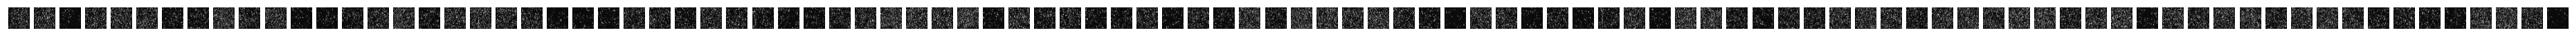

In [3]:
from cellpose import io, transforms
from omnipose.utils import normalize99
imgs = test_data
nimg = len(imgs)
fig = plt.figure(figsize=[40]*2) # initialize figure
for k in range(len(imgs)):
    img = transforms.move_min_dim(imgs[k]) # move the channel dimension last
    if len(img.shape)>2:
        imgs[k] = np.mean(img,axis=-1) # or just turn into grayscale

    imgs[k] = normalize99(imgs[k])
    plt.subplot(1,len(imgs),k+1)
    plt.imshow(imgs[k],cmap='gray')
    plt.axis('off')

In [35]:

model_list = natsorted(glob("training_data/models/*"))
model_name = model_list[-1]
print(model_name)
use_gpu = use_GPU# = False
model = models.CellposeModel(gpu=use_gpu, pretrained_model=model_name, omni=True, concatenation=True)


training_data/models/cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_training_data_2023_02_15_17_46_13.046976_epoch_3999
2023-02-16 16:17:31,251 [INFO] ** TORCH GPU version installed and working. **
2023-02-16 16:17:31,251 [INFO] >>>> using GPU


In [36]:
chans = [0,0] #this means segment based on first channel, no second channel

n = [0] # make a list of integers to select which images you want to segment
n = range(nimg) # or just segment them all

# define parameters
mask_threshold = -1
verbose = 0 # turn on if you want to see more output
use_gpu = use_GPU #defined above
transparency = True # transparency in flow output
rescale=None # give this a number if you need to upscale or downscale your images
omni = True # we can turn off Omnipose mask reconstruction, not advised
flow_threshold = 0. # default is .4, but only needed if there are spurious masks to clean up; slows down output
resample = True #whether or not to run dynamics on rescaled grid or original grid
masks_syntrained, flows, styles = model.eval([imgs[i] for i in n],channels=chans,rescale=rescale,mask_threshold=mask_threshold,transparency=transparency,
                                  flow_threshold=flow_threshold,omni=omni,resample=resample,verbose=verbose)



2023-02-16 16:18:19,321 [INFO] 100%|##########| 100/100 [00:48<00:00,  2.08it/s]


In [38]:
use_gpu = use_GPU# = False
model = models.CellposeModel(gpu=use_gpu, model_type="bact_fluor_omni", omni=True, concatenation=True)


2023-02-16 16:19:20,360 [INFO] >>bact_fluor_omni<< model set to be used
2023-02-16 16:19:20,377 [INFO] ** TORCH GPU version installed and working. **
2023-02-16 16:19:20,378 [INFO] >>>> using GPU


In [39]:
chans = [0,0] #this means segment based on first channel, no second channel

n = [0] # make a list of integers to select which images you want to segment
n = range(nimg) # or just segment them all

# define parameters
mask_threshold = -1
verbose = 0 # turn on if you want to see more output
use_gpu = use_GPU #defined above
transparency = True # transparency in flow output
rescale=None # give this a number if you need to upscale or downscale your images
omni = True # we can turn off Omnipose mask reconstruction, not advised
flow_threshold = 0. # default is .4, but only needed if there are spurious masks to clean up; slows down output
resample = True #whether or not to run dynamics on rescaled grid or original grid
masks_pretrained, flows, styles = model.eval([imgs[i] for i in n],channels=chans,rescale=rescale,mask_threshold=mask_threshold,transparency=transparency,
                                  flow_threshold=flow_threshold,omni=omni,resample=resample,verbose=verbose)



2023-02-16 16:20:09,929 [INFO] 100%|##########| 100/100 [00:49<00:00,  2.02it/s]


In [40]:
for idx,i in enumerate(n):
    Image.fromarray(masks_pretrained[idx]).save(f"segmented_test_images//pretrained_{idx}.png")
    Image.fromarray(masks_syntrained[idx]).save(f"segmented_test_images//syntrained_{idx}.png")


In [4]:

model_list = natsorted(glob("training_data_0.75_sq_mic/models/*"))
model_name = model_list[-1]
print(model_name)
use_gpu = use_GPU# = False
model = models.CellposeModel(gpu=use_gpu, pretrained_model=model_name, omni=True, concatenation=True)
chans = [0,0] #this means segment based on first channel, no second channel

n = [0] # make a list of integers to select which images you want to segment
n = range(nimg) # or just segment them all

# define parameters
mask_threshold = -1
verbose = 0 # turn on if you want to see more output
use_gpu = use_GPU #defined above
transparency = True # transparency in flow output
rescale=None # give this a number if you need to upscale or downscale your images
omni = True # we can turn off Omnipose mask reconstruction, not advised
flow_threshold = 0. # default is .4, but only needed if there are spurious masks to clean up; slows down output
resample = True #whether or not to run dynamics on rescaled grid or original grid
masks_syntrained, flows, styles = model.eval([imgs[i] for i in n],channels=chans,rescale=rescale,mask_threshold=mask_threshold,transparency=transparency,
                                  flow_threshold=flow_threshold,omni=omni,resample=resample,verbose=verbose)



training_data_0.75_sq_mic/models/cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_training_data_0.75_sq_mic_2023_02_26_02_08_31.748301_epoch_3999
2023-02-26 23:16:10,779 [INFO] ** TORCH GPU version installed and working. **
2023-02-26 23:16:10,780 [INFO] >>>> using GPU
2023-02-26 23:17:15,983 [INFO] 100%|##########| 100/100 [01:05<00:00,  1.54it/s]


In [5]:
for idx,i in enumerate(n):
    Image.fromarray(masks_syntrained[idx]).save(f"segmented_test_images//0.75_sq_mic_syntrained_{idx}.png")


In [6]:

model_list = natsorted(glob("training_data_1.5_sq_mic/models/*"))
model_name = model_list[-1]
print(model_name)
use_gpu = use_GPU# = False
model = models.CellposeModel(gpu=use_gpu, pretrained_model=model_name, omni=True, concatenation=True)
chans = [0,0] #this means segment based on first channel, no second channel

n = [0] # make a list of integers to select which images you want to segment
n = range(nimg) # or just segment them all

# define parameters
mask_threshold = -1
verbose = 0 # turn on if you want to see more output
use_gpu = use_GPU #defined above
transparency = True # transparency in flow output
rescale=None # give this a number if you need to upscale or downscale your images
omni = True # we can turn off Omnipose mask reconstruction, not advised
flow_threshold = 0. # default is .4, but only needed if there are spurious masks to clean up; slows down output
resample = True #whether or not to run dynamics on rescaled grid or original grid
masks_syntrained, flows, styles = model.eval([imgs[i] for i in n],channels=chans,rescale=rescale,mask_threshold=mask_threshold,transparency=transparency,
                                  flow_threshold=flow_threshold,omni=omni,resample=resample,verbose=verbose)

for idx,i in enumerate(n):
    Image.fromarray(masks_syntrained[idx]).save(f"segmented_test_images//1.5_sq_mic_syntrained_{idx}.png")


training_data_1.5_sq_mic/models/cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_training_data_1.5_sq_mic_2023_02_26_05_23_38.964745_epoch_3999
2023-02-26 23:18:09,886 [INFO] ** TORCH GPU version installed and working. **
2023-02-26 23:18:09,886 [INFO] >>>> using GPU
2023-02-26 23:19:00,664 [INFO] 100%|##########| 100/100 [00:50<00:00,  1.97it/s]


In [7]:

model_list = natsorted(glob("training_data_2.25_sq_mic/models/*"))
model_name = model_list[-1]
print(model_name)
use_gpu = use_GPU# = False
model = models.CellposeModel(gpu=use_gpu, pretrained_model=model_name, omni=True, concatenation=True)
chans = [0,0] #this means segment based on first channel, no second channel

n = [0] # make a list of integers to select which images you want to segment
n = range(nimg) # or just segment them all

# define parameters
mask_threshold = -1
verbose = 0 # turn on if you want to see more output
use_gpu = use_GPU #defined above
transparency = True # transparency in flow output
rescale=None # give this a number if you need to upscale or downscale your images
omni = True # we can turn off Omnipose mask reconstruction, not advised
flow_threshold = 0. # default is .4, but only needed if there are spurious masks to clean up; slows down output
resample = True #whether or not to run dynamics on rescaled grid or original grid
masks_syntrained, flows, styles = model.eval([imgs[i] for i in n],channels=chans,rescale=rescale,mask_threshold=mask_threshold,transparency=transparency,
                                  flow_threshold=flow_threshold,omni=omni,resample=resample,verbose=verbose)

for idx,i in enumerate(n):
    Image.fromarray(masks_syntrained[idx]).save(f"segmented_test_images//2.25_sq_mic_syntrained_{idx}.png")


training_data_2.25_sq_mic/models/cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_training_data_2.25_sq_mic_2023_02_26_13_57_38.361054_epoch_3999
2023-02-26 23:19:01,940 [INFO] ** TORCH GPU version installed and working. **
2023-02-26 23:19:01,940 [INFO] >>>> using GPU
2023-02-26 23:19:52,212 [INFO] 100%|##########| 100/100 [00:50<00:00,  1.99it/s]


In [9]:
natsorted(glob("training_data_3.0_sq_mic//*"))

[]

In [8]:

model_list = natsorted(glob("training_data_3.0_sq_mic/models/*"))
model_name = model_list[-1]
print(model_name)
use_gpu = use_GPU# = False
model = models.CellposeModel(gpu=use_gpu, pretrained_model=model_name, omni=True, concatenation=True)
chans = [0,0] #this means segment based on first channel, no second channel

n = [0] # make a list of integers to select which images you want to segment
n = range(nimg) # or just segment them all

# define parameters
mask_threshold = -1
verbose = 0 # turn on if you want to see more output
use_gpu = use_GPU #defined above
transparency = True # transparency in flow output
rescale=None # give this a number if you need to upscale or downscale your images
omni = True # we can turn off Omnipose mask reconstruction, not advised
flow_threshold = 0. # default is .4, but only needed if there are spurious masks to clean up; slows down output
resample = True #whether or not to run dynamics on rescaled grid or original grid
masks_syntrained, flows, styles = model.eval([imgs[i] for i in n],channels=chans,rescale=rescale,mask_threshold=mask_threshold,transparency=transparency,
                                  flow_threshold=flow_threshold,omni=omni,resample=resample,verbose=verbose)

for idx,i in enumerate(n):
    Image.fromarray(masks_syntrained[idx]).save(f"segmented_test_images//3.0_sq_mic_syntrained_{idx}.png")


IndexError: list index out of range

In [10]:

model_list = natsorted(glob("training_data_3.75_sq_mic/models/*"))
model_name = model_list[-1]
print(model_name)
use_gpu = use_GPU# = False
model = models.CellposeModel(gpu=use_gpu, pretrained_model=model_name, omni=True, concatenation=True)
chans = [0,0] #this means segment based on first channel, no second channel

n = [0] # make a list of integers to select which images you want to segment
n = range(nimg) # or just segment them all

# define parameters
mask_threshold = -1
verbose = 0 # turn on if you want to see more output
use_gpu = use_GPU #defined above
transparency = True # transparency in flow output
rescale=None # give this a number if you need to upscale or downscale your images
omni = True # we can turn off Omnipose mask reconstruction, not advised
flow_threshold = 0. # default is .4, but only needed if there are spurious masks to clean up; slows down output
resample = True #whether or not to run dynamics on rescaled grid or original grid
masks_syntrained, flows, styles = model.eval([imgs[i] for i in n],channels=chans,rescale=rescale,mask_threshold=mask_threshold,transparency=transparency,
                                  flow_threshold=flow_threshold,omni=omni,resample=resample,verbose=verbose)

for idx,i in enumerate(n):
    Image.fromarray(masks_syntrained[idx]).save(f"segmented_test_images//3.75_sq_mic_syntrained_{idx}.png")


training_data_3.75_sq_mic/models/cellpose_residual_on_style_on_concatenation_off_omni_nclasses_4_training_data_3.75_sq_mic_2023_02_26_02_09_26.695707_epoch_3999
2023-02-26 23:21:27,831 [INFO] ** TORCH GPU version installed and working. **
2023-02-26 23:21:27,832 [INFO] >>>> using GPU
2023-02-26 23:22:21,699 [INFO] 100%|##########| 100/100 [00:53<00:00,  1.86it/s]
